In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
batch1 = pickle.load(open(r'.\Data\batch1.pkl', 'rb'))
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [4]:
numBat1 = len(batch1.keys())
numBat1

41

In [5]:
batch2 = pickle.load(open(r'.\Data\batch2.pkl','rb'))
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [6]:
numBat2 = len(batch2.keys())
numBat2

43

In [7]:
batch3 = pickle.load(open(r'.\Data\batch3.pkl','rb'))
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c38']
del batch3['b3c39']

In [8]:
numBat3 = len(batch3.keys())

In [9]:
numBat = numBat1 + numBat2 + numBat3

In [10]:
bat_dict = {**batch1, **batch2, **batch3}

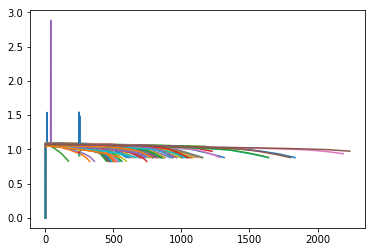

In [11]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])